In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from matplotlib import lines

from microjet import filters, regions, process, dataio, measure
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [29]:
# Load the data stack and the metadata 
image_stack_raw, metadata = dataio.h5_metadata("example_data/001.h5")

# Ensure the data is in float32 format to reduce the amount of data in memory
image_stack_raw = image_stack_raw.astype(np.float32)

# Make a copy of the raw data so we don't mess with it
image_stack = image_stack_raw.copy()

# save the nozzle tip index position
ntip_idx = 1020

# Remove the nozzle tip from the image stack
image_stack = image_stack[:,:ntip_idx,:]

# Normalize the image stack to determine the typical brightness of a jet
for i in range(image_stack.shape[0]):
    # only use nonzero values for the normalization
    nonz = np.nonzero(image_stack[i,:,:])
    # divide by the median pixel value of the whole stack
    image_stack[i, :, :] /= np.median(image_stack[i][nonz])
    
# Filter the image stack using a Sobel filter
image_stack_filtered = filters.sobel(image_stack)

# Threshold the image stack using the hysterisis method
image_stack_thresholded_0 = filters.threshold_hysteresis_clipped(image_stack_filtered, low=.1, high=0.6)

image_stack_thresholded = process.binary_closing(image_stack_thresholded_0, iterations=1)
image_stack_thresholded = process.binary_erosion(image_stack_thresholded, iterations=1)

image_stack_thresholded_bad = process.binary_erosion(image_stack_thresholded_0, iterations=3)
image_stack_thresholded_bad = process.binary_dilation(image_stack_thresholded_bad, iterations=3)


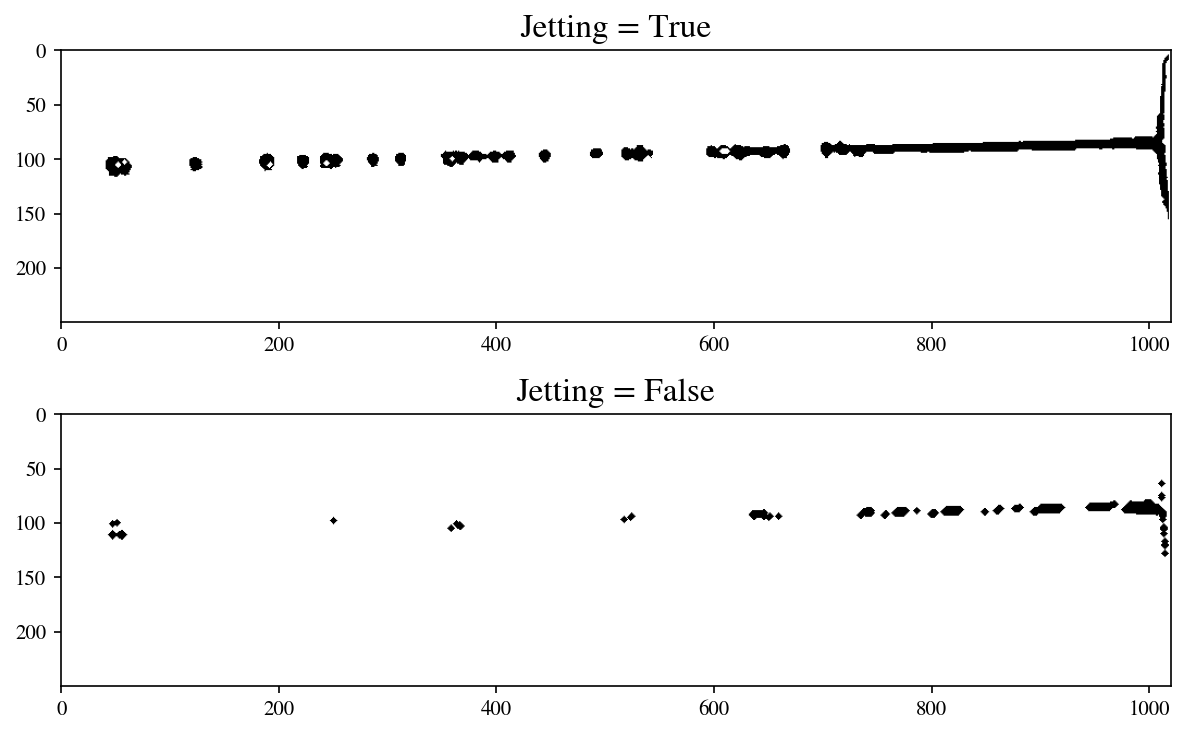

In [31]:
fig, ax = plt.subplots(2,1,figsize=(10,5), tight_layout=True, sharey=True, dpi=150)

ax[0].imshow(image_stack_thresholded[0][:,150:400].T, cmap='gray_r')#, vmin=0, vmax=10)
ax[0].set_title("Jetting = True", fontsize=16)
ax[1].imshow(image_stack_thresholded_bad[0][:,150:400].T, cmap='gray_r')
ax[1].set_title("Jetting = False", fontsize=16)

plt.show()

In [41]:
jet_detected, xs = measure.identify_jetting(image_stack_thresholded[0][:,150:400], threshold=0.85)

In [42]:
jet_detected

True

In [43]:
jet_detected_bad, xs_bad = measure.identify_jetting(image_stack_thresholded_bad[0][:,150:400], threshold=0.85)

In [44]:
jet_detected_bad

False

In [46]:
0.85 * np.shape(image_stack_thresholded[0][:,150:400])[0]

867.0